In [29]:
# moa_metric.ipynb
# 2020.11.26
# MoA metric from https://www.youtube.com/watch?v=D7i67UT3O3o&feature=youtu.be

import numpy as np

def clip(x, eps = 1E-15):  
  return np.fmax(  np.fmin(x, 1.0-eps), eps  )

def my_log_loss(y, yht, eps = 1E-15):
  yht_clipped = clip(yht, eps=eps)
  r = -np.sum(y*np.log(yht_clipped) + (1-y)*np.log(1-yht_clipped))/len(y)
  return r

from sklearn.metrics import log_loss

In [30]:
N=20 # number of targets - we will assume each target is a constant for all entry points
Y = TARGTES = np.random.randint(0,2,N)
print('TARGTES=Y=',TARGTES)

print('log_loss(Y,Y) = ',log_loss(Y,Y)  )
assert log_loss(Y,Y) == my_log_loss(Y,Y)

TARGTES=Y= [0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1]
log_loss(Y,Y) =  9.992007221626413e-16


In [31]:
NPred=10
print(f'here are {NPred} possible predictions')
yhats = predictions = np.arange(0,1.01,1/(NPred-1))
print('yhats=',yhats)

print('We select one of them and assume it is predicted value for each of the TARGETS=Y.')
preds = np.array([yhats[0]]*N)
print('So, we predict these values for Y : ',preds)
print('log_loss(Y,preds) = ',log_loss(Y,preds)  )
print('Q: do log_loss and my_log_loss match?   A:', log_loss(Y,preds) == my_log_loss(Y,preds) )
assert log_loss(Y,preds) == my_log_loss(Y,preds)

here are 10 possible predictions
yhats= [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
We select one of them and assume it is predicted value for each of the TARGETS=Y.
So, we predict these values for Y :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
log_loss(Y,preds) =  17.26938819745534
Q: do log_loss and my_log_loss match?   A: True


In [32]:
xs = [] 
ys = []
for yhat in  yhats:
  # print('yhat=',yhat)
  xs.append(yhat)
  ys.append( log_loss( Y, np.array([yhat]*N) ) )

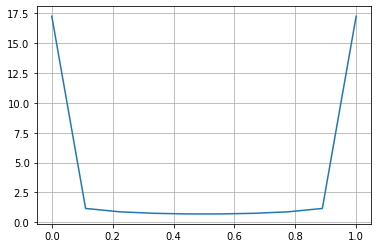

In [33]:
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt
plt.plot(xs,ys)
plt.grid()

# Test log_loss, find optimal log_loss solution **yhats** for a given **TARGET**

In [34]:
# TARGTES=Y= np.array([0,1,1,1,0,1,1,0,1,1,0,0,1,1,0,1,0,1,0,1])

N=10 # number of targets - we will assume each target is a constant for all entry points
Y = TARGTES = np.random.randint(0,2,N)
print('TARGTES=Y=',TARGTES)

eps = 1E-10
yhats = [0.5]*len(Y)
print('yhats=',yhats)

TARGTES=Y= [0 1 1 1 1 0 0 1 1 0]
yhats= [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


In [35]:
log_loss(Y,yhats)

0.6931471805599453

In [36]:
r = np.random.randint(0,2,N)-0.5
r

array([ 0.5,  0.5, -0.5, -0.5, -0.5, -0.5, -0.5,  0.5,  0.5, -0.5])

In [37]:
yhats + r

array([1., 1., 0., 0., 0., 0., 0., 1., 1., 0.])

In [38]:
log_loss(Y,yhats+r)

13.815590517707292

In [42]:
EPS = 1E-15

for EPS in [1E-15,1E-10,1E-5,1E-3,1E-2,1E-1,2E-1]:
  logls = []
  for i in range(20):
    r = np.random.randint(0,2,N)-0.5
    logls.append(   round(log_loss(Y,yhats+r, eps=EPS),1)  )
  print( EPS,
        round(np.mean(logls),1),   
        round(np.median(logls),1), 
        round(np.std(logls),1), 
        logls)

1e-15 18.5 17.2 7.2 [13.8, 13.8, 10.4, 24.2, 13.8, 20.7, 13.8, 13.8, 6.9, 6.9, 20.7, 20.7, 27.6, 24.2, 13.8, 24.2, 13.8, 31.1, 31.1, 24.2]
1e-10 12.1 11.5 2.5 [13.8, 13.8, 11.5, 11.5, 6.9, 16.1, 9.2, 6.9, 11.5, 13.8, 13.8, 16.1, 11.5, 9.2, 11.5, 13.8, 13.8, 11.5, 13.8, 11.5]
1e-05 5.5 5.8 1.3 [5.8, 5.8, 5.8, 5.8, 6.9, 5.8, 4.6, 3.5, 6.9, 8.1, 5.8, 5.8, 3.5, 4.6, 5.8, 6.9, 3.5, 3.5, 6.9, 4.6]
0.001 3.8 3.5 0.9 [4.1, 3.5, 3.5, 4.8, 3.5, 4.1, 3.5, 4.1, 3.5, 3.5, 6.2, 3.5, 2.1, 2.8, 4.1, 2.1, 4.8, 3.5, 4.8, 3.5]
0.01 2.0 1.8 0.7 [2.3, 1.8, 2.3, 2.3, 3.2, 2.3, 2.8, 0.9, 1.4, 3.7, 1.4, 0.9, 1.8, 1.4, 1.8, 2.3, 3.2, 1.4, 1.8, 1.4]
0.1 1.2 1.2 0.2 [1.0, 1.6, 1.2, 1.0, 1.2, 1.2, 0.8, 1.4, 0.8, 1.6, 0.8, 1.0, 1.4, 1.2, 1.4, 1.0, 1.2, 1.4, 1.4, 1.4]
0.2 1.0 0.9 0.2 [0.8, 0.6, 0.9, 0.9, 0.8, 0.8, 1.2, 1.1, 1.1, 1.1, 0.9, 0.9, 1.2, 0.8, 0.5, 1.3, 0.8, 1.3, 1.3, 0.9]
